## The purpose of this file
**Remove search tag** and more node, if necessary, from the original aam to make optimization feasible.<br>
Make an **modified aggregate adjacency matrix** and save it.

In [1]:
import sys
sys.path.append('../')
import powerlaw
import networkx as nx
import toolbox as tb
%matplotlib inline

In [2]:
tag = "coordinate"
hashtag = "コーデ" # This variable is necessary for data processing in the module 'toolbox'.
timespan = "23-23"
tau = 92
G = nx.read_graphml(f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam.graphml')

In [3]:
ag = tb.AggregateNetwork(G, tau, hashtag)

In [4]:
ag.tau, ag.searchtag, ag.G.number_of_nodes()

(92, 'コーデ', 10952)

In [5]:
# Check hubs
ag.check_degree()

isolate:[]


,degree
コーデ,10951
ファッション,5518
fashion,3996
ootd,3902
コーディネート,3018
...,...
archive,1
ash_2022,1
011140991,1
頭にフィットするタイトボブ,1


In [6]:
ag.remove_searchtag()

Isolates after removal of the searchtag: 
['頭にフィットするタイトボブ', '011140645_15', 'tiktokでsilentの紬ちゃんが着てる服に似てるって言われてニタニタしちゃった', 'willfully', 'emmi', 'cizatto', 'ash_2022', 'archive', '011140991', 'skr_👗', 'シャツドッキングヘリンボーン柄ニットワンピース']
These isolate nodes are to be removed.
The isolate nodes were successfully deleted.


In [7]:
# Check hubs
ag.check_degree()

isolate:[]


,degree
ファッション,5517
fashion,3995
ootd,3901
コーディネート,3017
コーデ,2283
...,...
rodeocrownswidebowl,1
靴下屋ルミネ大宮2店,1
리비노,1
havehopestyling,1


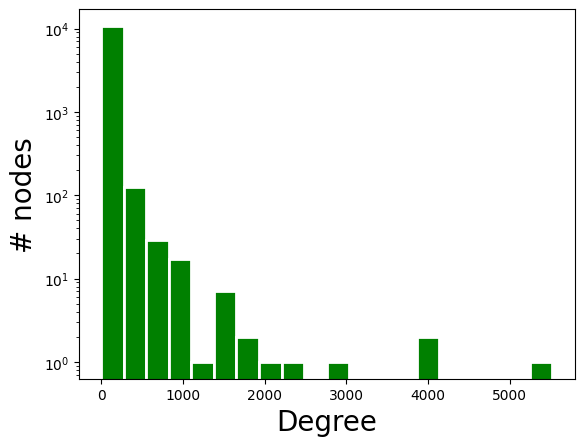

In [8]:
ag.plot_dd(20)

In [9]:
tb.fit_power_law(G)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.314138094562433, 
its standard error sigma: 0.03585939834167316, 
k_min: 60.0


(2.314138094562433, 0.03585939834167316, 60.0)

In [10]:
tb.compare_distribution(G,"power_law", "exponential")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms exponential distribution with significance level 1.0969342430855943e-08.


In [11]:
tb.compare_distribution(G,"power_law", "lognormal")

Calculating best minimal value for power law fit
------------------------------------------------
The lognormal distribution outperforms power_law distribution with significance level 0.07526641259894953.


In [12]:
# Save figure for future use
fname1 = f"../data/figure/degree_distribution/pdfccdf1_{tag}_{timespan}_{tau}.pdf"
fname2 = f"../data/figure/degree_distribution/pdfccdf2_{tag}_{timespan}_{tau}.pdf"
print(fname1)
print(fname2)

../data/figure/degree_distribution/pdfccdf1_coordinate_23-23_92.pdf
../data/figure/degree_distribution/pdfccdf2_coordinate_23-23_92.pdf


Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.314138094562433, 
its standard error sigma: 0.03585939834167316, 
k_min: 60.0


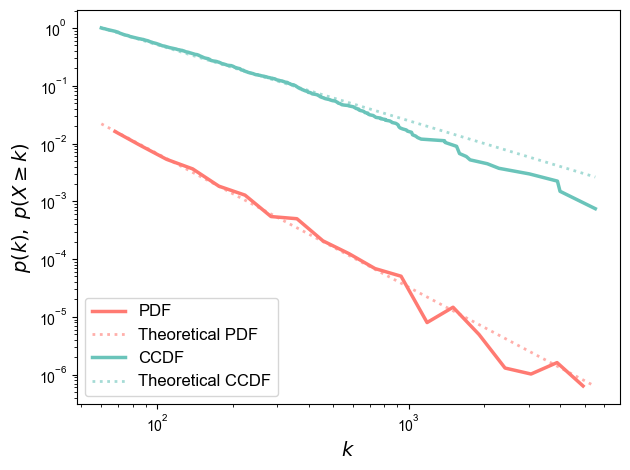

In [13]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname1)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.314138094562433, 
its standard error sigma: 0.03585939834167316, 
k_min: 60.0


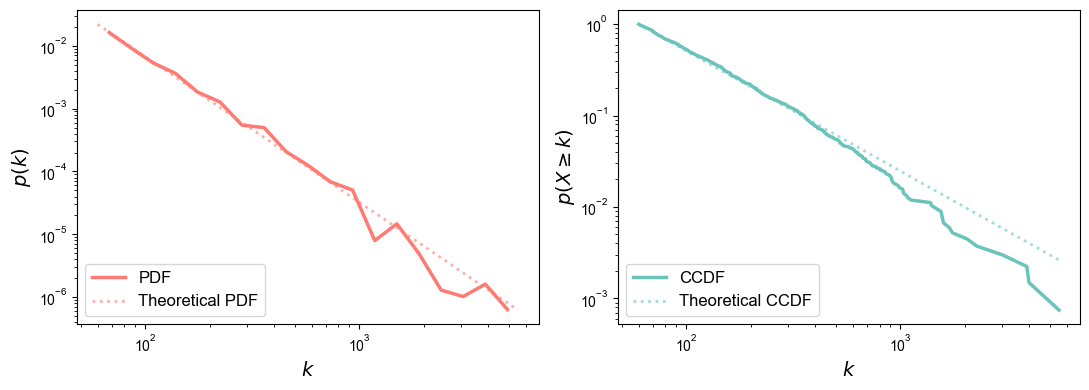

In [14]:
tb.plot_pdf_ccdf(G, sep=True, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname2)

In [15]:
# Save modified aam for statistical test
nx.write_graphml(ag.G, f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml', encoding='utf-8')